# Machine Learning - Tarea 1
---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings as w

import sklearn.linear_model as lm
import sklearn.feature_selection as fs
import scipy.sparse as spsp

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, train_test_split
from scipy.sparse import csr_matrix
from scipy.io import mmread

---
## 1.- LSS
---
### 1.a

#### Construcción del Dataframe

In [2]:
df = pd.read_csv("kc_house_data.csv", sep=',', header=0)
df = df.drop(["id", "date", "zipcode"], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


---
### 1.b

#### Descripción de la data

In [3]:
df.shape

(21613, 18)

Tenemos 21613 datos, con 18 atributos cada uno. Tipos de datos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


---
Información estadística de los atributos.

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


---
### 1.c

#### Normalización

Como podemos ver, los datos tienen diferentes ordenes de magnitud, por lo que resulta deseable normalizar para poder comparar mas facilmente.

In [6]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)

scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))

df_scaled_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
count,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,1.512900e+04,15129.0
mean,1.286858e-16,-1.615617e-16,7.890223e-17,1.831659e-17,-8.242465e-17,-1.878624e-18,-4.720044e-17,-1.817569e-16,2.799150e-16,-3.663318e-17,-4.109491e-17,5.161521e-16,1.127175e-17,-1.267743e-14,2.542342e-14,-1.225802e-16,2.817937e-17,1.0
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.0
min,-3.695522e+00,-2.714893e+00,-1.844550e+00,-3.578749e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-3.675091e+00,-3.940270e+00,-1.695150e+00,-6.746338e-01,-2.400159e+00,-2.174314e-01,-2.890957e+00,-2.184469e+00,-2.338019e+00,-4.573661e-01,1.0
25%,-3.963096e-01,-7.372207e-01,-7.074380e-01,-2.446882e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-6.733930e-01,-5.071207e-01,-7.031746e-01,-6.746338e-01,-6.147711e-01,-2.174314e-01,-6.799023e-01,-8.048581e-01,-7.175202e-01,-2.870689e-01,1.0
50%,-3.963096e-01,-7.799663e-02,-1.775219e-01,-1.868669e-01,-8.478007e-01,-8.674852e-02,-3.101098e-01,-6.733930e-01,-5.071207e-01,-2.691856e-01,-6.746338e-01,6.367636e-02,-2.174314e-01,9.432470e-02,-1.150526e-01,-2.125067e-01,-2.007706e-01,1.0
75%,7.034278e-01,5.812274e-01,4.959132e-01,-1.122745e-01,1.113119e+00,-8.674852e-02,-3.101098e-01,8.274559e-01,3.511665e-01,4.747956e-01,6.581544e-01,8.135394e-01,-2.174314e-01,8.506629e-01,6.322367e-01,5.301602e-01,-1.110232e-01,1.0
max,8.401590e+00,7.832692e+00,1.268398e+01,3.825488e+01,4.054499e+00,1.152757e+01,4.846968e+00,2.328305e+00,4.642603e+00,9.501768e+00,1.003210e+01,1.706233e+00,4.645406e+00,1.557628e+00,6.466842e+00,6.144722e+00,3.081912e+01,1.0


Importancia de:
```python
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))
```
Necesitamos agregar esta columna con puros numeros 1 para permitir que el hiperplano definido por $\hat{\beta}$ no pase por el origen (supuesto fuerte), lo que permite que la solución se ajuste mejor a la data.

---
### 1.d

#### Regresión Lineal

Parámetros de las funciones de regresión:

Ponemos `fit_intercept=False` ya estamos manejando el intercepto manualmente (lo que se explicó un poco más arriba).
`df_scaled_train` es nuestro _train set_ estandarizado, con un 70% de los datos para poder hacer _validation_.  
`ytrain` es el 70% del _target_ de entrenamiento. Sobre ellos se realizará LS.

In [7]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(df_scaled_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Podemos ver los coeficientes

In [8]:
coefs = linreg.predict(np.eye(18)) # \beta
for i in range(len(coefs)):
    print("beta_{:<3}: ".format(i), "{: 30.11f}".format(coefs[i]))

beta_0  :                  -0.01047654677
beta_1  :                   0.05580572653
beta_2  :       2084981145279.43164062500
beta_3  :                   0.02311373844
beta_4  :                   0.03602241255
beta_5  :                   0.03369242471
beta_6  :                   0.04240071828
beta_7  :                   0.04730077274
beta_8  :                   0.18402031704
beta_9  :      -1856339042220.82666015625
beta_10 :      -1036234728457.26806640625
beta_11 :                  -0.10499224089
beta_12 :                   0.01505789063
beta_13 :                   0.18775357794
beta_14 :                  -0.00408909745
beta_15 :                   0.08441782663
beta_16 :                  -0.00724660961
beta_17 :                  13.03331309108


In [9]:
delta_y = ytrain - linreg.predict(df_scaled_train) # y - \hat{y}
sigma2 = delta_y.dot(delta_y) / (Xtrain.shape[0]-coefs.shape[0]-1)
sigma = np.sqrt(sigma2)
print("sigma: ", sigma) # \hat{sigma}

sigma:  0.254169378388


Para evitar el mal condicionamiento en la matrix $(X^TX)^{-1}$ al sacar los $v$ utilizamos la descomposición _svd_, ya que la forma de esta matriz hace que uno pueda aprovechar esta factorización de la siguiente manera:

$$ X = U \Sigma V^T $$
$$ \Rightarrow X^TX = (U \Sigma V^T)^T U \Sigma V^T $$
$$ = V \Sigma U^T U \Sigma V^T $$
$$ = V \Sigma^2 V^T $$
$$ \Rightarrow (X^TX)^{-1} = V (\Sigma^{-1})^2 V^T $$

Con $\Sigma$ matriz diagonal.

In [10]:
X_U, X_Sigma, X_VT = sp.linalg.svd(df_scaled_train, full_matrices=False)
X_Sigma_inv = 1/X_Sigma
mat_v = X_VT.T @ np.diag(X_Sigma_inv**2) @ X_VT
v = np.diag(mat_v)
v

array([  2.15228115e-04,   2.25023523e-04,   8.00619830e+25,
         1.47701354e-04,   1.34174573e-04,   7.88323044e-05,
         9.64146363e-05,   8.80462803e-05,   2.34502126e-04,
         6.34653495e+25,   1.97759960e+25,   1.49180854e-04,
         7.67920920e-05,   7.43109905e-05,   1.00146454e-04,
         1.98788337e-04,   1.45116251e-04,   6.69019753e-05])

In [11]:
z_scores = coefs / (sigma * np.sqrt(v))
for i in range(len(z_scores)):
    print("{:>20} :".format(df_scaled_train.columns.values[i]), "{: .10e}".format(z_scores[i]))

            bedrooms : -2.8096060452e+00
           bathrooms :  1.4636646350e+01
         sqft_living :  9.1678127396e-01
            sqft_lot :  7.4826379073e+00
              floors :  1.2235295387e+01
          waterfront :  1.4929901034e+01
                view :  1.6989418066e+01
           condition :  1.9833049800e+01
               grade :  4.7279095094e+01
          sqft_above : -9.1678127396e-01
       sqft_basement : -9.1678127396e-01
            yr_built : -3.3820298322e+01
        yr_renovated :  6.7605598522e+00
                 lat :  8.5691643074e+01
                long : -1.6076312749e+00
       sqft_living15 :  2.3556756341e+01
          sqft_lot15 : -2.3667566902e+00
           intercept :  6.2692000910e+03


---
### 1.f

#### K-Folds

In [12]:
Xm = Xtrain.as_matrix() # no escalada, se escala en el kfold
ym = ytrain.as_matrix()

df_scaled_test = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)
df_scaled_test.insert(df_scaled_test.shape[1], 'intercept', np.ones(df_scaled_test.shape[0]))

yhat_test = linreg.predict(df_scaled_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))

In [13]:
kf5 = KFold(n_splits=5)
mse_cv5 = 0

for train, val in kf5.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    
    linregk = lm.LinearRegression(fit_intercept = False)
    linregk.fit(df_cross_train, ym[train])
    
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    
    yhat_val = linregk.predict(df_cross_test)
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv5 += mse_fold
    
mse_cv5 = mse_cv5 / 5

In [14]:
kf10 = KFold(n_splits=10)
mse_cv10 = 0

for train, val in kf10.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    
    linregk = lm.LinearRegression(fit_intercept = False)
    linregk.fit(df_cross_train, ym[train])
    
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]),columns=Xtrain.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    
    yhat_val = linregk.predict(df_cross_test)
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv10 += mse_fold

mse_cv10 = mse_cv10 / 10

In [15]:
print("MSE - test    :", mse_test)
print("MSE - 5-fold  :", mse_cv5)
print("MSE - 10-fold :", mse_cv10)

MSE - test    : 0.0652782517314
MSE - 5-fold  : 0.0646896867901
MSE - 10-fold : 0.0646879195203


Los errores resultan similares en los tres casos, lo cual es razonable tomando en cuenta la cantidad de datos. Esto también permite asumir con cierta certeza que este error no esta sujeto al _train set_ (no existe _under_ u _overfitting_) y entonces los datos provienen de la misma distribución de probabilidad.

---
### 1.j

#### Cuantiles de los errores

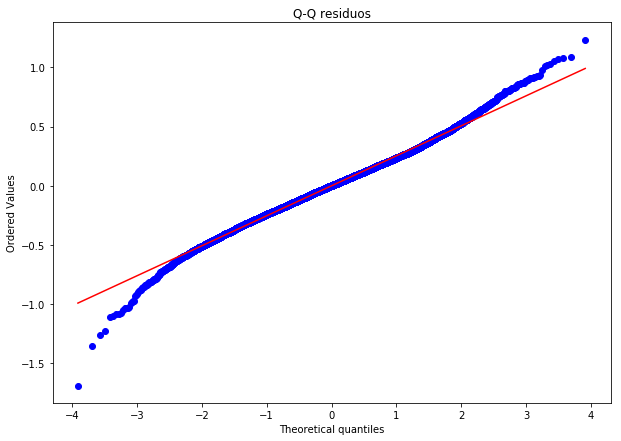

In [16]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
res = sp.stats.probplot(delta_y, dist=sp.stats.norm, plot=ax)
ax.set_title("Q-Q residuos")
plt.show()

Podemos ver en el gráfico Q-Q que tenemos una amplia sección lineal, lo que nos permite concluir que la hipótesis de normalidad sobre los residuos (datos transformados) es razonable con este modelo. No nos queda precisamente $y=x$ ya que estamos comparando con una distribución normal estándar, por lo que la pendiente depende de la varianza de la distribución de los errores.

---
### 1.h

#### Cambio de Distribución

In [17]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    frames.append(df[(np.log(df.price) >= z) & (np.log(df.price) < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)

X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price

Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [18]:
linregA = lm.LinearRegression(fit_intercept=False)
linregA.fit(Xtrain_A, ytrain_A)

linregB = lm.LinearRegression(fit_intercept=False)
linregB.fit(Xtrain_B, ytrain_B)

deltay_A = yval_A - linregA.predict(Xval_A)
deltay_B = yval_B - linregB.predict(Xval_B)

err_A = np.mean(np.power(deltay_A, 2))
err_B = np.mean(np.power(deltay_B, 2))

print("Error A :", "{: >16.1f}".format(err_A))
print("Error B :", "{: >16.1f}".format(err_B))

Error A :    65924698143.8
Error B :    98697823835.2


Claramente la segunda muestra tiene un error más grande. Esto se debe a que se rompe el supuesto de que los datos provienen de la misma distribución, ya que se fuerza a que la segunda distribución le de una mayor importancia a los outliers (es como una normal pero se trunca la parte de arriba).

---

---
## 2.- 

### Selección de Atributos

In [19]:
Xm_scaled = df_scaled_train.as_matrix()
ym = ytrain.as_matrix()

Xtm_scaled = df_scaled_test.as_matrix()
ytm = ytest.as_matrix()

Primero vemos el ejemplo que aparece en la tarea.

In [20]:
def fss(x, y, x_t, y_t, names_x, k = 10000, verbose=False):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    mse_list_train = []
    mse_list_test = []
    
    while remaining and len(selected)<=k :
        score_candidates = []
        model = lm.LinearRegression(fit_intercept=False)
        
        for candidate in remaining:
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates.reverse()
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        
        if verbose:
            print(
                "totalvars : {}".format(len(indexes)),
                "selected  : {}".format(names_x[best_candidate]),
                "mse       : {}".format(best_new_score),
                sep='\n', end='\n\n'
            )
        
        x_train = x[:, selected]
        x_test = x_t[:, selected]
        current_model = model.fit(x_train, y)
        
        predictions_train_res = y - current_model.predict(x_train)
        predictions_test_res = y_t - current_model.predict(x_test)
        
        mse_list_train.append(np.mean(np.power(predictions_train_res, 2)))
        mse_list_test.append(np.mean(np.power(predictions_test_res, 2)))
        
    return selected, mse_list_train, mse_list_test

totalvars : 2
selected  : grade
mse       : 0.14326033079203015

totalvars : 3
selected  : lat-long
mse       : 0.10334021506202552

totalvars : 4
selected  : sqft_living
mse       : 0.08495993855440029

totalvars : 5
selected  : yr_built
mse       : 0.07544699760974252

totalvars : 6
selected  : view
mse       : 0.07178175750290368

totalvars : 7
selected  : sqft_lot15
mse       : 0.0699791994298082

totalvars : 8
selected  : bathrooms
mse       : 0.06825066052479337

totalvars : 9
selected  : condition
mse       : 0.06686414604604933

totalvars : 10
selected  : waterfront
mse       : 0.06583601905193925

totalvars : 11
selected  : floors
mse       : 0.06510710526495975

totalvars : 12
selected  : sqft_lot
mse       : 0.06482021927345558

totalvars : 13
selected  : yr_renovated
mse       : 0.06461934452735124

totalvars : 14
selected  : bedrooms
mse       : 0.06458343496747103

totalvars : 15
selected  : sqft_above
mse       : 0.0645541505027465

totalvars : 16
selected  : intercept
m

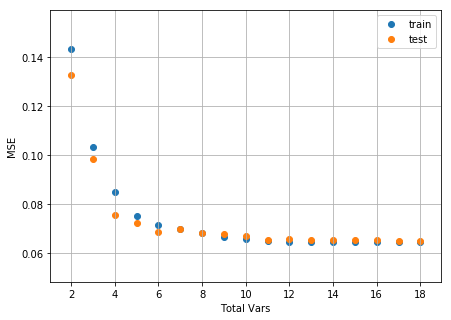

In [21]:
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15","intercept"]

# las listas estan ordenadas por el numero de dimensiones del modelo
attr_indexes, train_mse, test_mse = fss(Xm_scaled, ym, Xtm_scaled, ytm, names_regressors, verbose=True)

fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.scatter(range(2,2+len(train_mse)), train_mse, label="train")
ax1.scatter(range(2,2+len(test_mse)), test_mse, label="test")
ax1.legend()
ax1.set_xlabel("Total Vars")
ax1.set_ylabel("MSE")
ax1.grid()

plt.show()

---
Nuestra primera modificación consiste en definir una tolerancia y agregar solo mientras el error sea mayor a esta tolerancia.

In [22]:
def fss_tol(x, y, x_t, y_t, names_x, k = 10000, tol = 0.005, verbose=False):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    aux_score = 1.0
    mse_list_train = []
    mse_list_test = []
    
    while (remaining) and (len(selected) <= k) and (tol <= np.abs(aux_score - best_new_score)):
        score_candidates = []
        model = lm.LinearRegression(fit_intercept=False)
        
        for candidate in remaining:
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates.reverse()
        aux_score = best_new_score
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        
        if verbose:
            print(
                "totalvars : {}".format(len(indexes)),
                "selected  : {}".format(names_x[best_candidate]),
                "mse       : {}".format(best_new_score),
                sep='\n', end='\n\n'
            )
        
        x_train = x[:, selected]
        x_test = x_t[:, selected]
        current_model = model.fit(x_train, y)
        
        predictions_train_res = y - current_model.predict(x_train)
        predictions_test_res = y_t - current_model.predict(x_test)
        
        mse_list_train.append(np.mean(np.power(predictions_train_res, 2)))
        mse_list_test.append(np.mean(np.power(predictions_test_res, 2)))
        
    return selected, mse_list_train, mse_list_test

totalvars : 2
selected  : grade
mse       : 0.14326033079203015

totalvars : 3
selected  : lat-long
mse       : 0.10334021506202552

totalvars : 4
selected  : sqft_living
mse       : 0.08495993855440029

totalvars : 5
selected  : yr_built
mse       : 0.07544699760974252

totalvars : 6
selected  : view
mse       : 0.07178175750290368



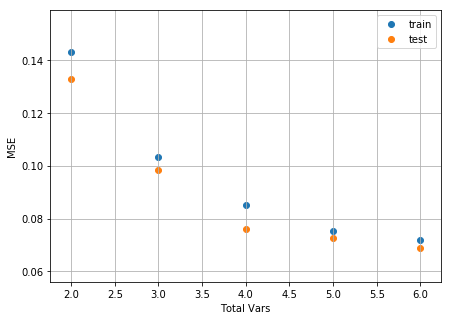

In [23]:
attr_indexes, train_mse, test_mse = fss_tol(Xm_scaled, ym, Xtm_scaled, ytm, names_regressors, verbose=True)

fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.scatter(range(2,2+len(train_mse)), train_mse, label="train")
ax1.scatter(range(2,2+len(test_mse)), test_mse, label="test")
ax1.legend()
ax1.set_xlabel("Total Vars")
ax1.set_ylabel("MSE")
ax1.grid()

plt.show()

---

Nuestro segundo approach es utilizar _mutual information_ y agregar las primeras _k_ variables que tengan mayor información.

In [24]:
def fss_mi(x, y, x_t, y_t, names_x, k = 10000, n=6, verbose=False):
    p = x.shape[1]-1
    n = min(p, n)
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    mse_list_train = []
    mse_list_test = []
    
    score_candidates = list(zip(fs.mutual_info_regression(x, y), range(p)))
    score_candidates.sort()
    
    for i in range(2, n+1):
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        
        if verbose:
            print(
                "totalvars   : {}".format(i),
                "selected    : {}".format(names_x[best_candidate]),
                "mutual-info : {}".format(best_new_score),
                sep='\n', end='\n\n'
            )
            
        x_train = x[:, selected]
        x_test = x_t[:, selected]
        
        model = lm.LinearRegression(fit_intercept=False)
        current_model = model.fit(x_train, y)
        
        predictions_train_res = y - current_model.predict(x_train)
        predictions_test_res = y_t - current_model.predict(x_test)
        
        mse_list_train.append(np.mean(np.power(predictions_train_res, 2)))
        mse_list_test.append(np.mean(np.power(predictions_test_res, 2)))
        
    return selected, mse_list_train, mse_list_test

totalvars   : 2
selected    : lat-long
mutual-info : 0.3629999286027701

totalvars   : 3
selected    : sqft_living
mutual-info : 0.34155102236963764

totalvars   : 4
selected    : grade
mutual-info : 0.337455888234103

totalvars   : 5
selected    : sqft_lot15
mutual-info : 0.2741709823464591

totalvars   : 6
selected    : sqft_above
mutual-info : 0.25291834570600713

totalvars   : 7
selected    : bathrooms
mutual-info : 0.19964535168908215

totalvars   : 8
selected    : sqft_living15
mutual-info : 0.10912152315276291

totalvars   : 9
selected    : intercept
mutual-info : 0.08759954539368842

totalvars   : 10
selected    : bedrooms
mutual-info : 0.07645196950474276

totalvars   : 11
selected    : floors
mutual-info : 0.07149520030115486

totalvars   : 12
selected    : yr_built
mutual-info : 0.07148458829122095

totalvars   : 13
selected    : sqft_basement
mutual-info : 0.06896494886900406



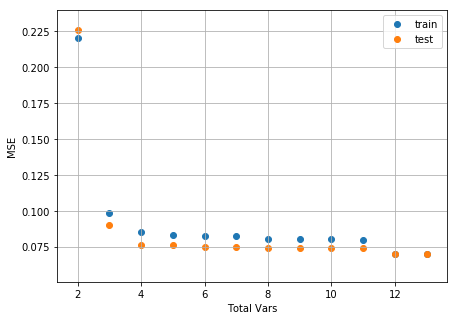

In [25]:
# Muy costoso!
# no tan buen comportamiento
attr_indexes, train_mse, test_mse = fss_mi(Xm_scaled, ym, Xtm_scaled, ytm, names_regressors, n=13, verbose=True)

fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.scatter(range(2,2+len(train_mse)), train_mse, label="train")
ax1.scatter(range(2,2+len(test_mse)), test_mse, label="test")
ax1.legend()
ax1.set_xlabel("Total Vars")
ax1.set_ylabel("MSE")
ax1.grid()

plt.show()

Podemos ver que no se comporta tan bien como el método anterior y es más costoso. Esto se debe a que _mutual information_ no presupone un modelo lineal, por lo que es un método más general. Como nuestro modelo lineal se ajusta bien al problema es mejor el primer criterio a pesar de ser más barato y no se justifica el uso del segundo.

---

---
## 3.- Regularización
---

### 3.a Ridge

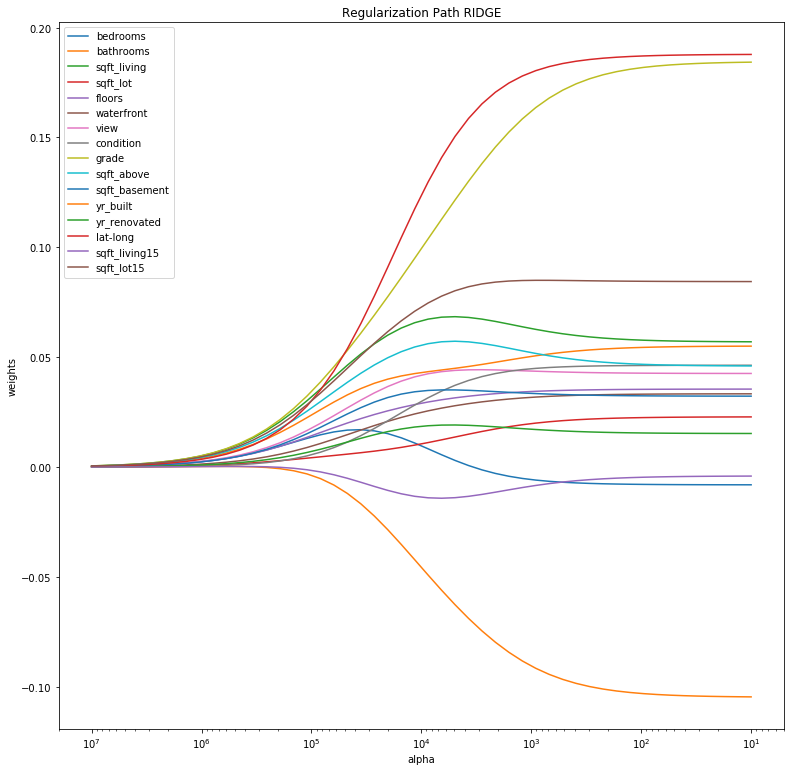

In [26]:
Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]

# alphas_ = np.logspace(4,-1,base=10)
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

plt.figure(figsize=(13,13))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Podemos ver que es bastante suave al castigar las variables, pero finalmente todas convergen a $0$ para un $\lambda$ grande

---
### 3.b Lasso

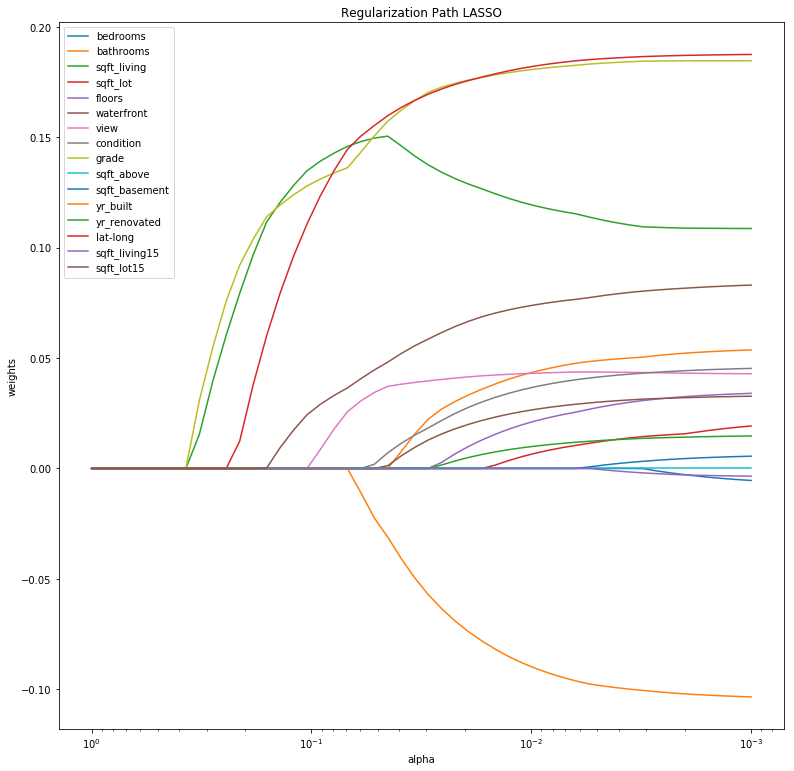

In [27]:
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

plt.figure(figsize=(13,13))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

Al igual que Ridge, Lasso va progresivamente eliminando los parametros mientras son mas fuertemente castigados. Para eliminar atributos, es decir reducir la dimensionalidad, resulta mas efectivo Lasso, pues los parametros colapsan a 0 mas rapidamente. Esto permite eliminar parametros de forma abrupta, sin graduar paulatinamente su influencia.

---
### 3.c Error de Ridge

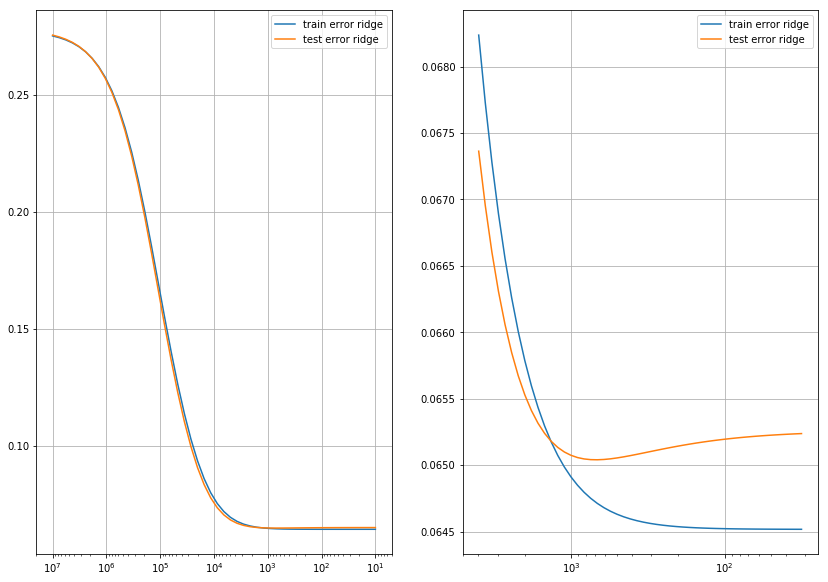

In [28]:
Xtest = df_scaled_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(7,1,base=10)
coefs = []

model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
plt.figure(figsize=(14,10))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend()
ax.set_xscale('log')
ax.grid()
ax.set_xlim(ax.get_xlim()[::-1])

alphas_ = np.logspace(3.6,1.5,base=10)
coefs = []

mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend()
ax.grid()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

El error en el train set disminuye  uniformemente mientras el parámetro decrece. En cambio, el error en el test set primero disminuye, cuando el agregar mas variables permite representar mejor el fenomeno. Luego de alcanzar su mínimo, aumenta ligeramente, pues seguir agregando mas parametros solo sobreajusta el modelo, reduciendo la generalizacion.

---
### 3.d Error de Lasso

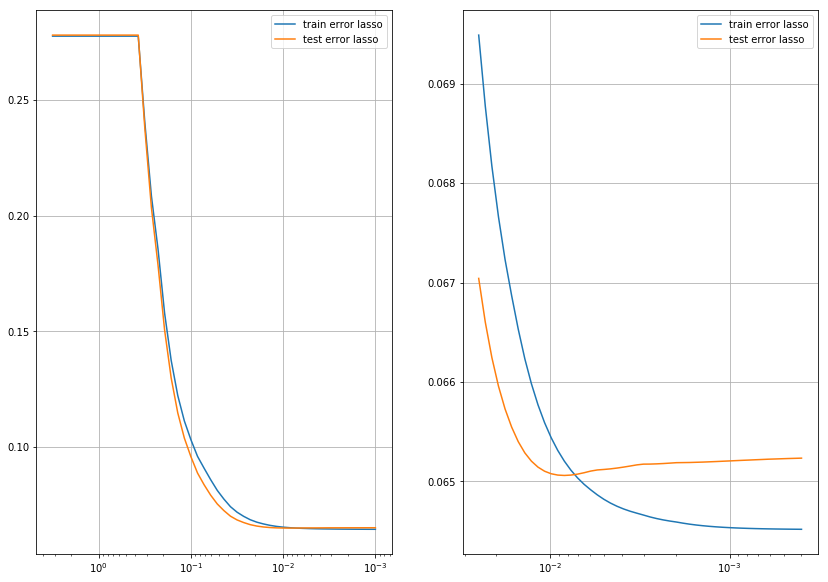

In [29]:
Xtest = df_scaled_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(0.5,-3,base=10)
coefs = []

model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    
plt.figure(figsize=(14,10))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend()
ax.grid()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

alphas_ = np.logspace(-1.6,-3.4,base=10)
coefs = []

mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend()
ax.grid()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

Al igual que en Ridge, el error error de entrenamiento aumenta mientras el numero de parametros disminuye y el error de test primero disminuye y luego aumenta cuando el numero de parametros aumenta. Si bien podemos ver igualmente el under y luego overfitting, estos se ven mas claros, pues los cambios son mas abruptos. Es mas facil identificar el punto de menor error.

---
### 3.e Cross-Validation

In [30]:
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

alphas_ = np.logspace(0.5, -2, base=10)

best_cv_mse = float("inf")

model = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = []
    
    for train,vald in KFold(10).split(Xm):
        cross_scaler = StandardScaler().fit(Xm[train])
        
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
        
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]), columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
        
        mse_list_k10.append(MSE(model.fit(df_cross_train, ym[train]).predict(df_cross_test),ym[vald]))
    
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
    print("best parameter : {:f},  MSE(cv) : {:f},  current : {:f}".format(best_alpha, best_cv_mse, a))

best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 3.162278
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 2.811769
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 2.500110
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 2.222996
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 1.976598
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 1.757511
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 1.562707
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 1.389495
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 1.235483
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 1.098541
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 0.976778
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 0.868511
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 0.772245
best parameter : 3.162278,  MSE(cv) : 0.277498,  current : 0.686649
best parameter : 3.162278,  MSE(cv) : 0.277498, 

Resulta bastante extraño que el último $\lambda$ sea el mejor ya que vimos en los gráficos que existía un mínimo local, puede ser por el rango de $\lambda$s que se pide.

---

---
## 4.- Predicción de Utilidades de Películas

---

In [31]:
X = csr_matrix(mmread('movies-preproc/not-full/test.x.mm'))
y = np.loadtxt('movies-preproc/not-full/test.y.dat')

In [32]:
X_train = csr_matrix(mmread('movies-preproc/not-full/train.x.mm'))
y_train = np.loadtxt('movies-preproc/not-full/train.y.dat')

In [33]:
X_val = csr_matrix(mmread('movies-preproc/not-full/dev.x.mm'))
y_val = np.loadtxt('movies-preproc/not-full/dev.y.dat')

Suponemos un comportamiento exponencial de los datos, por lo que sacamos el logaritmo al target para tener una solución lineal

In [34]:
y_log = np.log(y)
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

In [35]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(254, 145256) (254,)
(1147, 145256) (1147,)
(317, 145256) (317,)


Creamos una matriz conjunta con los datos del _train_ y el _validation_ para cuando tengamos que entrenar el modelo final.

In [36]:
total_X_train = spsp.vstack([ X_train, X_val ])
total_y_train_log = np.hstack([ y_train_log, y_val_log ])

#### Feature Selection

Seleccionamos las _k_ columnas con mayor información de acuerdo a su _score_ en minimos cuadrados. Luego transformamos todos los sets.

In [37]:
sel = fs.SelectKBest(fs.f_regression, k=500).fit(X_train, y_train_log)
X_train_fs = sel.transform(X_train)

In [38]:
X_train_fs.shape

(1147, 500)

In [39]:
X_val_fs = sel.transform(X_val)

In [40]:
final_sel = fs.SelectKBest(fs.f_regression, k=500).fit(total_X_train, total_y_train_log)

total_X_train_fs = final_sel.transform(total_X_train)

In [41]:
X_fs = final_sel.transform(X)

#### Lasso Regretion

Utilizamos el _validation set_ para encontrar el valor de $\alpha$ adecuado en la regresión de Lasso.

In [42]:
alphas_ = np.logspace(0.5,-2.5,base=10)
scores_val_lasso = []
model = Lasso(fit_intercept=True, max_iter=5000)

for i, a in zip(range(len(alphas_)), alphas_):
    model.set_params(alpha=a)
    
    with w.catch_warnings():
        w.simplefilter("ignore")
        
        model.fit(X_train_fs, y_train_log)
    
    loading_string = '['+'='*i+'>'+' '*(len(alphas_)-1-i)+'] {:>3d}%'.format(int((i+1)*100/len(alphas_)))
    loading_string = '\r'*len(loading_string) + loading_string
    print(loading_string, end='')
    
    scores_val_lasso.append(model.score(X_val_fs, y_val_log))

[=================================================>] 100%

Graficamos los scores de los $\lambda$s. Cabe destacar que a medida que disminuye el $\lambda$ aumenta la cantidad de iteraciones que debe realizar el método numérico que hace el _fit_ de Lasso, por lo que a partir de cierto $\lambda$ deja de converger y entrega una aproximación del resultado. Esto explica la curva que describe el gráfico.

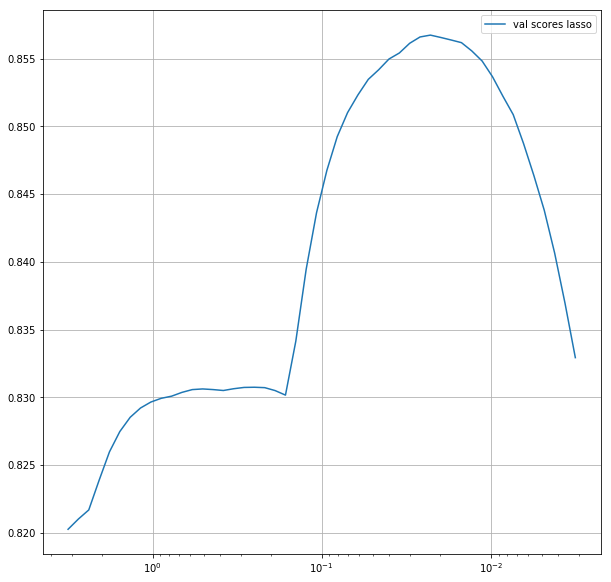

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(111)
ax = plt.gca()
ax.plot(alphas_,scores_val_lasso,label='val scores lasso')
plt.legend()
ax.set_xscale('log')
ax.grid()
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Y por último se entrena el modelo con el _train_+_validation_ set y el mayor $\lambda$ obtenido en la validación.

In [44]:
model.set_params(alpha=alphas_[np.argmax(scores_val_lasso)])
model.fit(total_X_train_fs, np.hstack((y_train_log, y_val_log)))
print("R2 : {:f}".format(model.score(X_fs, y_log)))

R2 : 0.868071


---

---

---